### **Ejercicios Planteados**

El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN

In [14]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist, squareform

In [15]:
# Cargar datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [16]:
abalone = abalone.drop('Sex', axis=1)
print(abalone.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [19]:
# Separar características (X) y la variable objetivo (y)
X = abalone.drop(columns=['Rings'])
y = abalone['Rings']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo K-NN
k = 5  # Número de vecinos
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 5.732009569377991


### 2. Realice estadística descriptiva para el conjunto de datos entregados.

In [21]:
# Estadísticas descriptivas
descriptive_stats = abalone.describe()

print(descriptive_stats)

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

### 3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

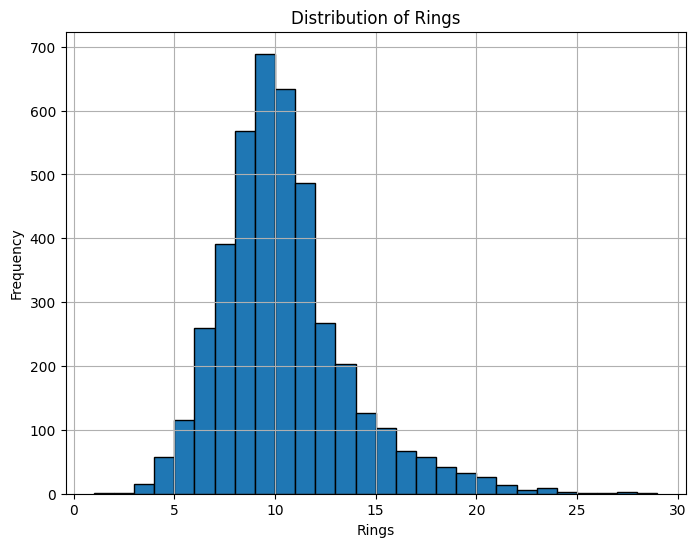

In [23]:
# Graficar histograma de la variable objetivo 'Rings'
plt.figure(figsize=(8, 6))
plt.hist(abalone['Rings'], bins=range(min(abalone['Rings']), max(abalone['Rings']) + 1), edgecolor='black')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')
plt.grid(True)
plt.show()

Interpretación:

El histograma muestra la distribución de la variable objetivo "Rings". Cada barra representa un rango de valores de anillos y la altura de la barra indica la frecuencia con la que aparecen esos valores en el conjunto de datos. Aquí algunas interpretaciones posibles:

La distribución parece ser asimétrica, con una cola hacia la derecha. Esto sugiere que hay más abulones con un menor número de anillos que con un número mayor.
La mayoría de los abulones parecen tener entre aproximadamente 5 y 15 anillos, con un pico en algún lugar dentro de ese rango.
Hay relativamente pocos abulones con un número muy bajo o muy alto de anillos, como lo indica la disminución en la frecuencia en los extremos del histograma.
Esta visualización te proporciona una idea clara de la distribución de la variable objetivo "Rings" en el conjunto de datos de abulones.

### 4. Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

In [24]:
# Calcular la matriz de correlación
correlation_matrix = abalone.corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  

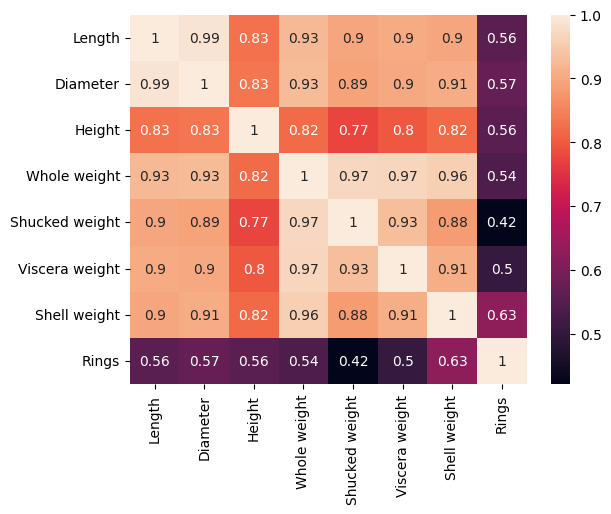

In [26]:
#Mostarmos el gráfico de la matriz de correlación
sns.heatmap(abalone.corr(), annot=True)
plt.show()

Esta matriz de correlación te mostrará el grado de asociación lineal entre cada par de variables en el conjunto de datos. Los valores pueden variar entre -1 y 1, donde:

1 indica una correlación positiva perfecta,
-1 indica una correlación negativa perfecta, y
0 indica que no hay correlación lineal.
Para identificar qué variables pueden estar correlacionadas, busca valores cercanos a 1 o -1 en la matriz de correlación. Las variables con valores altos (cercanos a 1 o -1) están altamente correlacionadas entre sí. Por otro lado, las variables con valores cercanos a 0 no están correlacionadas.

Algunas variables que podrían estar correlacionadas podrían ser:

-- "Length" y "Diameter": Dado que ambas medidas están relacionadas con las dimensiones físicas del abulón, es razonable esperar una alta correlación entre ellas.

-- "Whole weight" y "Shucked weight", "Viscera weight", "Shell weight": Estas variables están relacionadas con el peso del abulón y podrían mostrar correlaciones positivas entre sí.

-- "Length" y "Rings": Es posible que el tamaño del abulón esté relacionado con su edad, por lo que podría haber una correlación entre la longitud y el número de anillos.

Sin embargo, es importante tener en cuenta que la correlación no implica causalidad. Es decir, solo porque dos variables estén correlacionadas, no significa necesariamente que una cause la otra. Es necesario realizar análisis adicionales para determinar la naturaleza exacta de la relación entre las variables.

### 5. Defina las distancias en los vectores de las variables independientes. Para esto puede usar el atributo .values de Numpy

In [30]:
from scipy.spatial.distance import pdist, squareform

# Seleccionar las columnas de las variables independientes y convertirlas a una matriz de numpy
X = abalone.drop('Rings', axis=1).values

# Calcular las distancias entre los vectores de las variables independientes
distances = pdist(X, metric='euclidean')  # Puedes cambiar la métrica si lo deseas

# Convertir el vector de distancias a una matriz cuadrada
dist_matrix = squareform(distances)

# Mostrar la matriz de distancias
print(dist_matrix)


[[0.         0.35925409 0.20756505 ... 0.79612578 0.72399137 1.6981406 ]
 [0.35925409 0.         0.56142698 ... 1.14826663 1.07944917 2.04875059]
 [0.20756505 0.56142698 0.         ... 0.60424085 0.53367382 1.51066484]
 ...
 [0.79612578 1.14826663 0.60424085 ... 0.         0.10615437 0.91358976]
 [0.72399137 1.07944917 0.53367382 ... 0.10615437 0.         0.98398044]
 [1.6981406  2.04875059 1.51066484 ... 0.91358976 0.98398044 0.        ]]


### 6. Guarde los datos en una matriz y úselo en este código:

distances = np.linalg.norm(X - new_data_point, axis=1)

In [42]:
# Definir new_data_point. Debe ser un vector con la misma longitud que los vectores en X
new_data_point = np.array([0.5, 0.4, 0.3, 0.2, 0.1, 0.2, 0.3])

# Calcular las distancias entre new_data_point y todos los vectores en X
distances = np.linalg.norm(X - new_data_point, axis=1)

print("Distancias:", distances)

Distancias: [0.43780389 0.40165626 0.54043362 ... 1.07981318 1.01733881 1.98001256]


### 7. Determine cuáles son los tres vecinos más cercanos.

In [43]:
# Obtener los índices que ordenarían el array de distancias
indices = np.argsort(distances)

# Seleccionar los índices de las tres distancias más pequeñas
three_closest_indices = indices[:3]

print("Los tres vecinos más cercanos son los vectores en los índices:", three_closest_indices)

Los tres vecinos más cercanos son los vectores en los índices: [2641 1252  801]
